# 6.2.1 Regresión Logística

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")

Para un problema binario dicotomico con clases $C_1$ y $C_2$, la probabilidad de pertenencia de un punto $x$ a la clase $C_1$ depende de los parámetros del modelo $w$, tal que:

$$ p(C_1|w)= \sigma \left(w_0 + \sum_{i}^{} w_i * x_i \right) $$

y la pertenecia a la clase $C_2$ es igual a $1 − p(C_1|w)$. En la ecuación anterior, $\sigma(u)$ es la función logística:

$$ y_i = \sigma(u) = \frac{1}{1 + \exp(−u)} $$

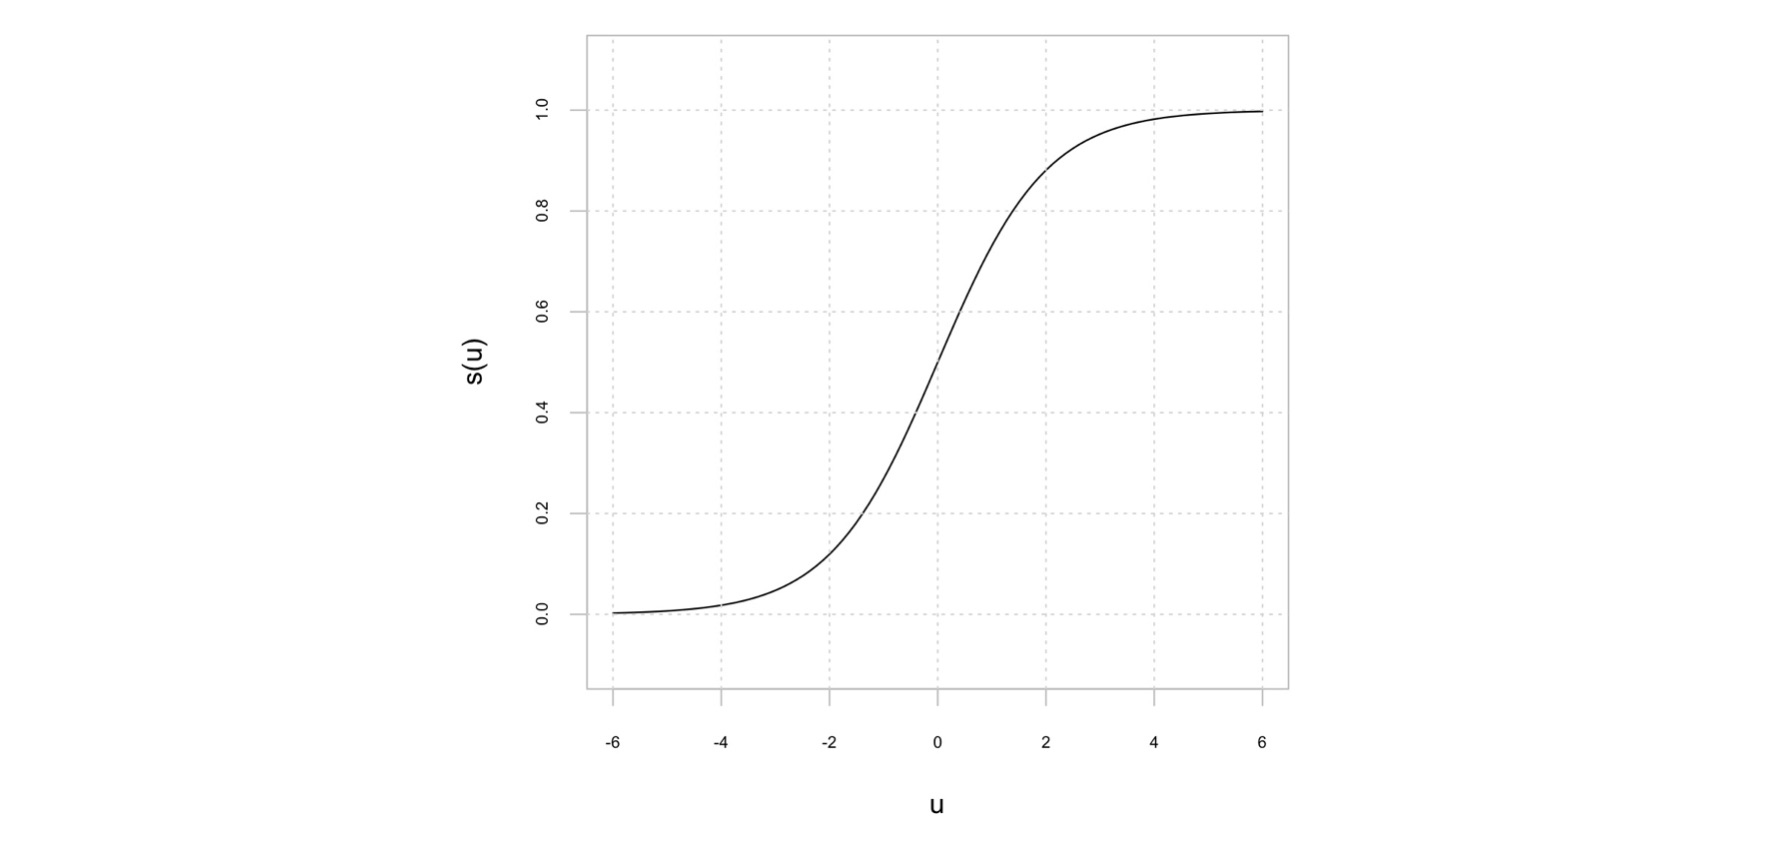

En la regresión logística, los parámetros del modelo se estiman a través de la minimización de la función de entropía cruzada, definida como:

$$ L = - \sum_{i}^{P} d_i * log(y_i) + (1 − d_i) * log(1 − y_i) $$

La interpretación es la siguiente:

Si $d_i = 1$, entonces se desea minimizar $−log(y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 1.0 (recuerde que la función logística genera valores entre 0 y 1, y que el término $(1 − d_i) = 0$).

Si $d_i = 0$, entonces se desea minimizar $−log(1 − y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 0.0.

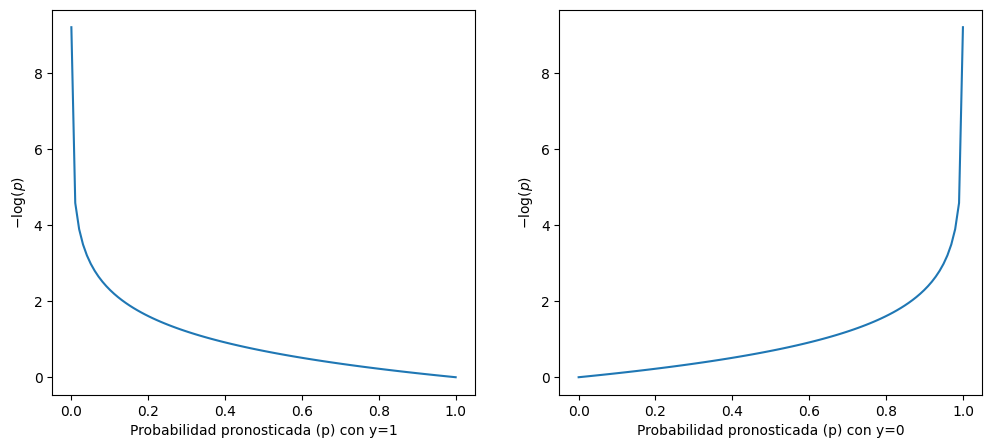

In [3]:
def plot_entropy():

    x = np.linspace(0.0001, 0.9999, 100)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, -np.log(x))
    plt.xlabel("Probabilidad pronosticada (p) con y=1")
    plt.ylabel("$-\log(p)$")

    plt.subplot(1, 2, 2)
    plt.plot(x, -np.log(1 - x))
    plt.xlabel("Probabilidad pronosticada (p) con y=0")
    plt.ylabel("$-\log(p)$")

    plt.show()

plot_entropy()

Para más de dos clases se generaliza a: 

$$ \sum_{}^{} d_c :nbsphinx-math:cdot :nbsphinx-math:log (p_c) $$ 

donde :math:`d_c

indica que el punto pertenece a la clase $c$ y $p_c$ es su probabilidad de pertenencia (resultado del clasificador). <br>
scikit-learn implementa diferentes funciones de costo, donde $y_i \ \in \ \{0,1\}$:

- Penalización l2
- Penalización l1
- Elastic-Net

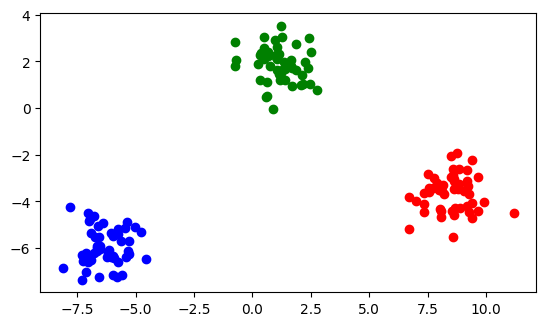

In [6]:
NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

In [9]:
logisticRegression = LogisticRegression(
    # --------------------------------------------------------------------------
    # Specify the norm of the penalty:
    # * None: no penalty is added.
    # * 'l2': add a L2 penalty term and it is the default choice.
    # * 'l1': add a L1 penalty term.
    # * 'elasticnet': both L1 and L2 penalty terms are added.
    penalty=None,
    # --------------------------------------------------------------------------
    # Tolerance for stopping criteria.
    tol=0.0001,
    # --------------------------------------------------------------------------
    # Inverse of regularization strength; must be a positive float. Like in
    # support vector machines, smaller values specify stronger regularization.
    C=1.0,
    # --------------------------------------------------------------------------
    # Specifies if a constant (a.k.a. bias or intercept) should be added to the
    # decision function.
    fit_intercept=True,
    # --------------------------------------------------------------------------
    # Weights associated with classes in the form {class_label: weight}. If not
    # given, all classes are supposed to have weight one.
    # * 'balanced' uses the values of y to automatically adjust weights
    # inversely proportional to class frequencies in the input data as
    # n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
    random_state=None,
    # --------------------------------------------------------------------------
    # Algorithm to use in the optimization problem. Default is ‘lbfgs’. To
    # choose a solver, you might want to consider the following aspects:
    # * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and
    #   ‘saga’ are faster for large ones.
    # * For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
    #   handle multinomial loss.
    # * ‘liblinear’ and is limited to one-versus-rest schemes.
    # * ‘newton-cholesky’ is a good choice for n_samples >> n_features,
    #   especially with one-hot encoded categorical features with rare
    #   categories. Note that it is limited to binary classification and the
    #   one-versus-rest reduction for multiclass classification. Be aware that
    #   the memory usage of this solver has a quadratic dependency on n_features
    #   because it explicitly computes the Hessian matrix.
    solver="lbfgs",
    # --------------------------------------------------------------------------
    # Maximum number of iterations taken for the solvers to converge.
    max_iter=100,
    # --------------------------------------------------------------------------
    # {‘ovr’, ‘multinomial’, ‘auto’}
    # If the option chosen is ‘ovr’, then a binary problem is fit for each
    # label. For ‘multinomial’ the loss minimised is the multinomial loss fit
    # across the entire probability distribution, even when the data is binary.
    multi_class="auto",
    # --------------------------------------------------------------------------
    verbose=0,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
    # --------------------------------------------------------------------------
    # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if
    # penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using
    # penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'.
    # For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
    l1_ratio=None,
)

logisticRegression.fit(X, d)

logisticRegression.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
logisticRegression.predict([[2.5, -4.0]])

array([0])

In [11]:
logisticRegression.intercept_

array([-5.32731038, -2.58361454,  7.91092493])

In [12]:
logisticRegression.coef_

array([[ 1.47085335, -1.78916427],
       [-1.03371155, -1.63099238],
       [-0.4371418 ,  3.42015665]])

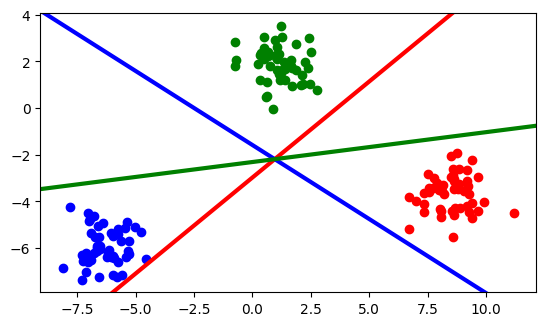

In [13]:
plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (
    -logisticRegression.intercept_[0] / logisticRegression.coef_[0][1]
    - logisticRegression.coef_[0][0] / logisticRegression.coef_[0][1] * xplot
)

fronteraB = (
    -logisticRegression.intercept_[1] / logisticRegression.coef_[1][1]
    - logisticRegression.coef_[1][0] / logisticRegression.coef_[1][1] * xplot
)

fronteraC = (
    -logisticRegression.intercept_[2] / logisticRegression.coef_[2][1]
    - logisticRegression.coef_[2][0] / logisticRegression.coef_[2][1] * xplot
)

plt.plot(xplot, fronteraA, color="red", linewidth=3)
plt.plot(xplot, fronteraB, color="blue", linewidth=3)
plt.plot(xplot, fronteraC, color="green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim);

In [14]:
logisticRegression.predict_proba(X)[0:10]

array([[9.99999996e-01, 3.37213413e-09, 5.87763928e-10],
       [9.99999987e-01, 9.83061700e-10, 1.16679900e-08],
       [1.00000000e+00, 4.42184492e-10, 2.02839427e-13],
       [9.99999997e-01, 2.32571602e-09, 3.57170430e-10],
       [9.99999999e-01, 2.91545720e-10, 1.06746679e-09],
       [9.99999793e-01, 2.06351621e-07, 9.43530066e-10],
       [1.00000000e+00, 1.30864625e-10, 2.63441344e-12],
       [9.99999984e-01, 1.22786241e-08, 3.48299674e-09],
       [1.00000000e+00, 5.12857770e-12, 2.08349752e-14],
       [9.99999986e-01, 1.26548112e-08, 8.47345532e-10]])

In [4]:
print('ok_')

ok_
